<a href="https://colab.research.google.com/github/alexbrill/tf-train/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [11]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
ds = df.values

X = ds[:, 0:4].astype(float)
Y = ds[:, 4]

In [4]:
enc = LabelEncoder()
enc_Y = enc.fit_transform(Y)
dummy_Y = to_categorical(enc_Y)

In [5]:
model = Sequential([
                    Dense(4, activation='relu'),
                    Dense(6, activation='relu'), #extra layer
                    Dense(6, activation='relu'), #extra layer
                    Dense(3, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
hist = model.fit(X, dummy_Y, epochs=75, batch_size=8, validation_split=0.1, verbose=0)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 21        
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


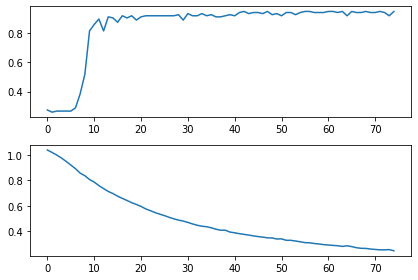

In [9]:
plt.subplot(211)
plt.plot(hist.history['accuracy'])

plt.subplot(212)
plt.plot(hist.history['loss'])

plt.tight_layout()

In [10]:
print('acc: {}, loss: {}'.format(hist.history['accuracy'][-1], hist.history['loss'][-1]))

acc: 0.9481481313705444, loss: 0.24606043100357056
